# 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 函数定义

In [2]:
def showfig(X, p, n_num=50):
    """ 显示估计结果
    Args:
        X: {ndarray(n_samples,)}
        p: {ndarray(n_num,)}
    Notes:
        - 一维
        - 范围为[min(x), max(x)]
    """
    x = np.linspace(np.min(X), np.max(X), num=n_num)
    plt.figure()
    plt.plot(x, p)
    plt.show()

# 生成数据
- 一维
- 服从$N(-5.0, 4.0)$与$N(5.0, 2.0)$

In [3]:
def make_data(showfig=False):
    """ 生成高斯分布数据，一维
    Returns: {ndarray(n_samples,)}
    """
    X1 = np.random.normal(loc=-5., scale=4., size=(1000,))
    X2 = np.random.normal(loc= 5., scale=2., size=(1000,))
    X = np.r_[X1, X2]
    if showfig:
        y = lambda x, mu, sigma: np.exp(-0.5 * ((x-mu)/sigma)**2) / (np.sqrt(2*np.pi)*sigma)
        x_fig = np.linspace(-20, 15, 100)
        y_fig = (y(x_fig, -5.0, 4.0) + y(x_fig, 5.0, 2.0)) / 2
        plt.figure(); plt.xlabel('x'); plt.ylabel('y')
        plt.plot(x_fig, y_fig)
        plt.show()
    return X

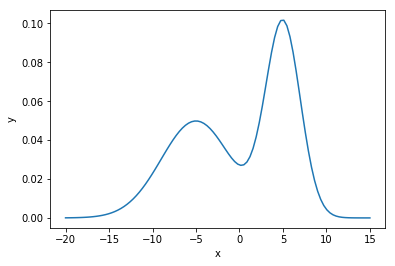

In [4]:
X = make_data(showfig=True)

# 直方图估计
可以用`matplotlib.pyplot.hist()`或`numpy.histogram()`实现

In [5]:
def histEstimate(X, n_bins, showfig=False):
    """ 直方图密度估计
    Args:
        n_bins: {int} 直方图的条数
    Returns:
        hist: {ndarray(n_bins,)}
    """
    n, bins, patches = plt.hist(X, bins=n_bins, normed=1, facecolor='lightblue', edgecolor='white')
    if showfig: plt.show()
    return n, bins, patches

c:\myapplications\python3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


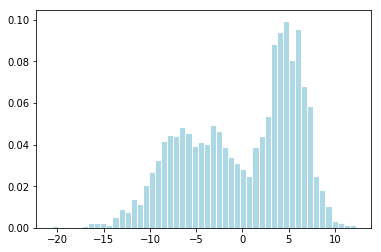

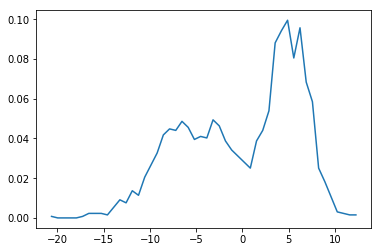

In [6]:
n_bins = 50
p, _, _ = histEstimate(X, n_bins, showfig=True)
showfig(X, p, n_num=n_bins)

# 核参数估计

## 核函数定义

In [7]:
gaussian = lambda z: np.exp(-0.5*(np.linalg.norm(z)**2)) / np.sqrt(2*np.pi)
square = lambda z: 1 if (np.linalg.norm(z) <= 0.5) else 0

In [8]:
def parzenEstimate(X, kernel, h, n_num=50):
    """ 核参数估计
    Args:
        X: {ndarray(n_samples,)}
        kernel: {function} 可调用的核函数
        h: {float} 核函数的参数
    Returns:
        p: {ndarray(n_num,)}
    Notes:
        - 一维，故`V_i = h`
        - p(x) = \frac{1}{M} \sum_{i=1}^M \kappa \left( \frac{x_i - x}{h} \right)
        - \kappa(z) = \frac{1}{V_i} \varphi(z) 
    """
    x = np.linspace(np.min(X), np.max(X), num=n_num)
    p = np.zeros(shape=(x.shape[0],))
    z = lambda x, x_i, h: (x - x_i) / h
    V_i = h; n_samples = X.shape[0]
    for idx in range(x.shape[0]):
        for i in range(X.shape[0]):
            p[idx] += kernel(z(x[idx], X[i], h)) / V_i
        p[idx] /= n_samples
    return p

## 均匀核

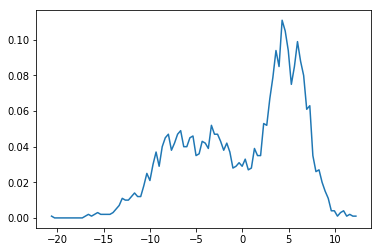

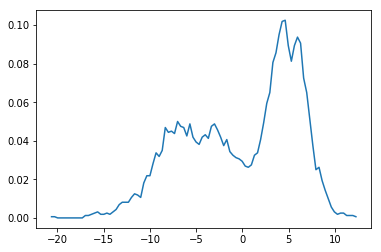

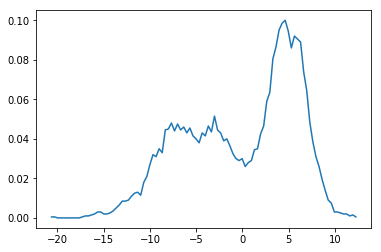

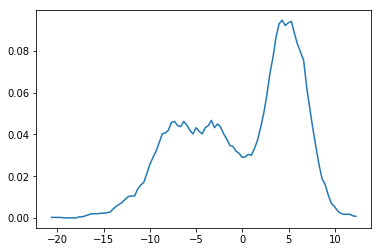

In [9]:
n_num = 100
p = parzenEstimate(X, square, h=0.5, n_num=n_num); showfig(X, p, n_num=n_num)
p = parzenEstimate(X, square, h=0.8, n_num=n_num); showfig(X, p, n_num=n_num)
p = parzenEstimate(X, square, h=1.0, n_num=n_num); showfig(X, p, n_num=n_num)
p = parzenEstimate(X, square, h=2.0, n_num=n_num); showfig(X, p, n_num=n_num)

## 高斯核

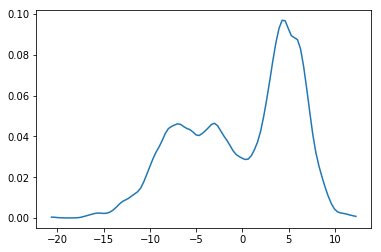

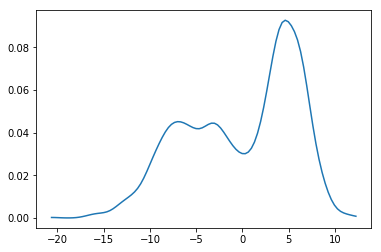

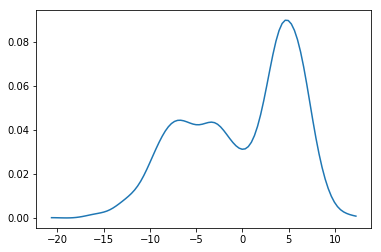

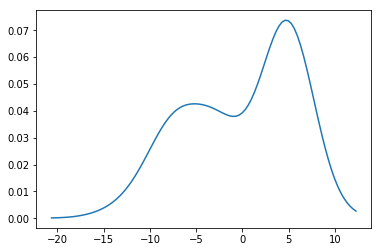

In [10]:
n_num = 100
p = parzenEstimate(X, gaussian, h=0.5, n_num=n_num); showfig(X, p, n_num=n_num)
p = parzenEstimate(X, gaussian, h=0.8, n_num=n_num); showfig(X, p, n_num=n_num)
p = parzenEstimate(X, gaussian, h=1.0, n_num=n_num); showfig(X, p, n_num=n_num)
p = parzenEstimate(X, gaussian, h=2.0, n_num=n_num); showfig(X, p, n_num=n_num)